In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from subcortex_visualization.plotting import plot_subcortical_data

## Example data just to show the different regions

First, let's create a simple dataframe with the left hemisphere cortical regions, assigning a different value to each region for visual clarity. 
Note that all data passed to `plot_subcortical_data` needs to follow the same three-column structure as shown below: `region` (the name of the subcortical region with the same nomenclature as shown), `value` (the value to be plotted in the subcortex map), and `Hemisphere` (either 'L', 'R', or 'both').

In [2]:
example_subcortex_data = pd.DataFrame({"region": ["accumbens", "amygdala", "caudate", "hippocampus", "pallidum", "putamen", "thalamus"], 
                                       "value": range(7)}).assign(Hemisphere = "L")

example_subcortex_data

,region,value,Hemisphere
0,accumbens,0,L
1,amygdala,1,L
2,caudate,2,L
3,hippocampus,3,L
4,pallidum,4,L
5,putamen,5,L
6,thalamus,6,L


Now, we can plot this data with the `plasma` colormap as an example in the left cortex. Note the following arguments: 
* `subcortex_data`: The three-column dataframe shown above
* `atlas`: The name of the atlas to plot (currently, only 'aseg' is supported)
* `line_thickness`: How thick the lines around each subcortical region should be drawn, in mm (default is 1.5)
* `line_color`: What color the lines around each subcortical region should be (default is 'black')
* `hemisphere`: Which hemisphere ('L' or 'R') the `subcortex_data` is from; can also be 'both' (default is 'L')
* `fill_title`: Name to add to legend
* `cmap`: Name of colormap (e.g., 'plasma' or 'viridis') or a `matplotlib.colors.Colormap` (default is 'viridis')
* `vmin`: Min fill value; this is optional, and you would only want to use this to manually constrain the fill range to match another figure
* `vmax`: Max fill value; this is optional, and you would only want to use this to manually constrain the fill range to match another figure

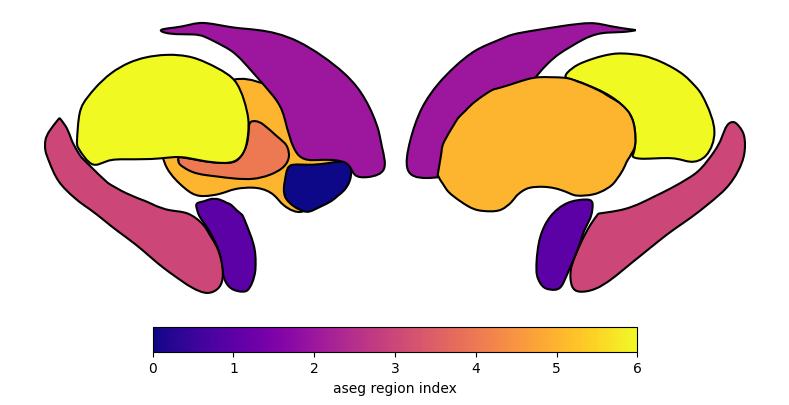

In [3]:
plot_subcortical_data(subcortex_data=example_subcortex_data, atlas = 'aseg',
                      line_thickness=1.5, line_color='black',
                          hemisphere='L', fill_title = "aseg region index", cmap='plasma', 
                          vmin=None, vmax=None)

If we wanted to plot this with the `inferno` color palette instead, just swap out the `cmap` argument values:

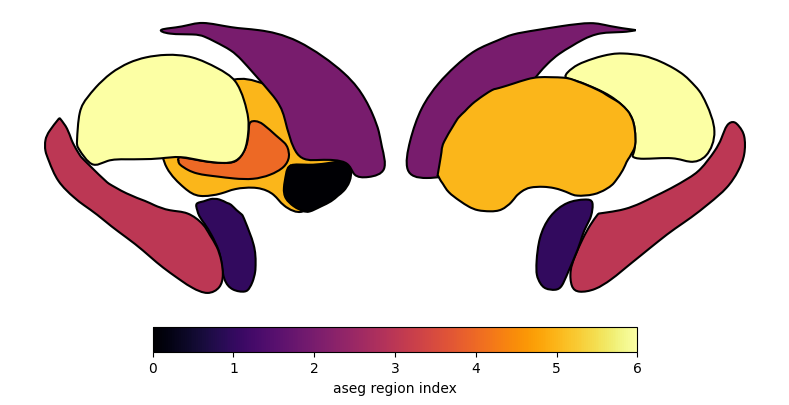

In [4]:
plot_subcortical_data(subcortex_data=example_subcortex_data, atlas = 'aseg', 
                      hemisphere='L', fill_title = "aseg region index", cmap='inferno')

By default, `plot_subcortical_data` will plot the index values of each region, so we actually don't need to pass in a dataframe for this visualization purpose.
Here, we can plot the region indices for the Melbourne Subcortex S1 atlas in right hemisphere without passing in any data:

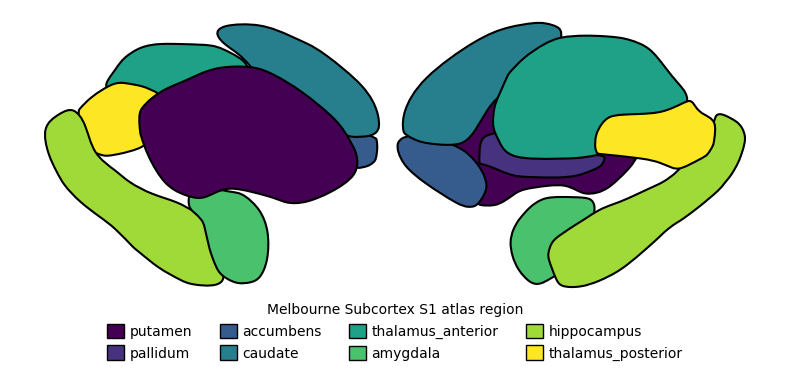

In [5]:
plot_subcortical_data(atlas = 'Melbourne_S1', hemisphere='R', 
                      fill_title = "Melbourne Subcortex S1 atlas region", 
                      cmap='viridis')

To plot both hemispheres using gray lines of 2mm thickness, we can set the `hemisphere` argument to 'both' and adjust the `line_thickness` and `line_color` arguments accordingly:

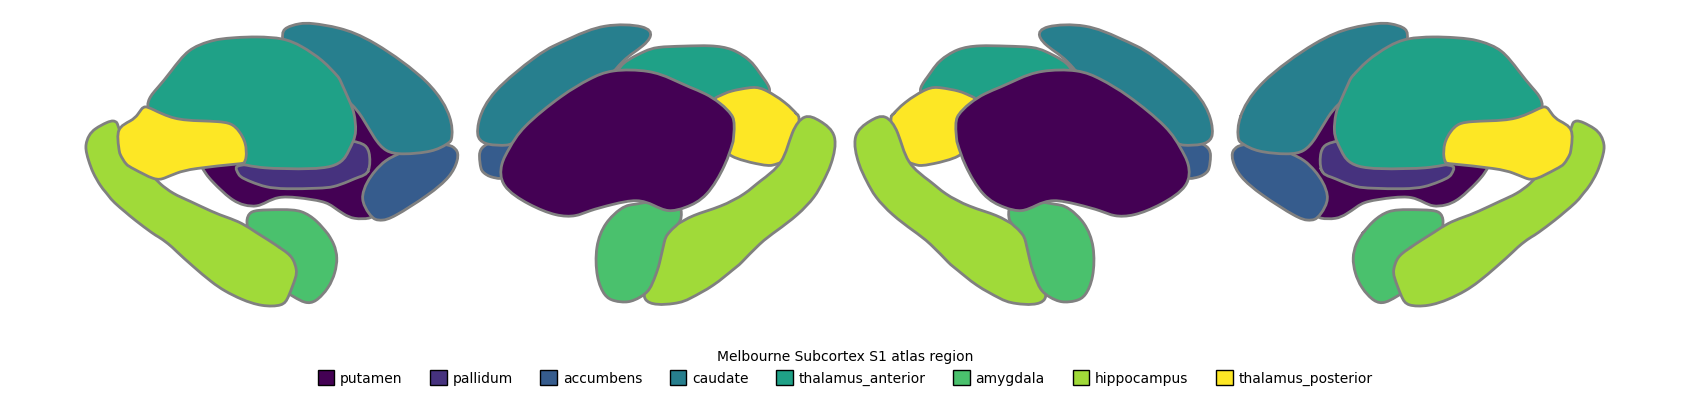

In [6]:
plot_subcortical_data(atlas = 'Melbourne_S1', hemisphere='both', 
                      line_color='gray', line_thickness=2,
                      fill_title = "Melbourne Subcortex S1 atlas region", cmap='viridis')

We can also use the S2 level of granularity from the Melbourne Subcortex (Tian 2020) Atlas:

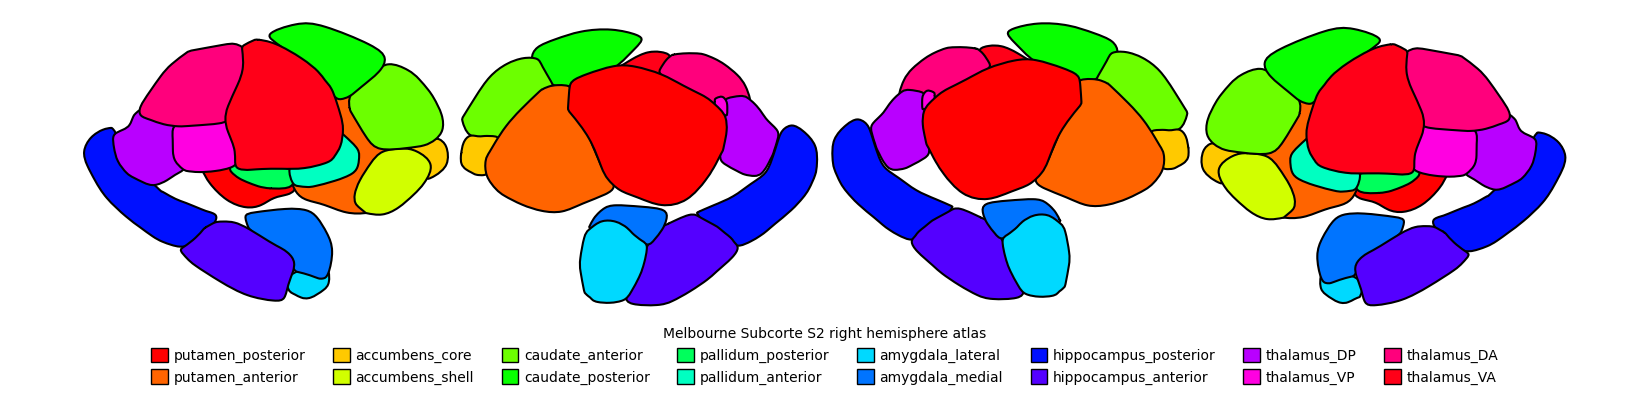

In [7]:
plot_subcortical_data(atlas = 'Melbourne_S2', hemisphere='both', 
                      fill_title = "Melbourne Subcorte S2 right hemisphere atlas", cmap='hsv')

Lastly, let's view the atlas for (1) [AICHA subcortex](https://www.sciencedirect.com/science/article/abs/pii/S0165027015002678) and (2) [Brainnetome subcortex](https://pmc.ncbi.nlm.nih.gov/articles/PMC4961028/):

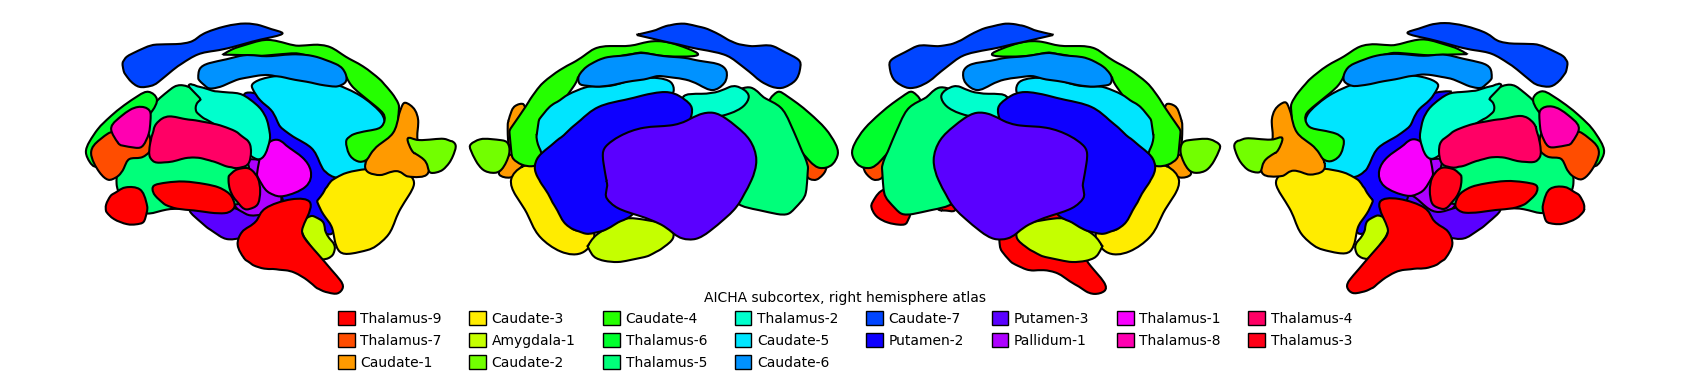

In [8]:
# AICHA
plot_subcortical_data(atlas = 'AICHA', hemisphere='both', 
                      fill_title = "AICHA subcortex, right hemisphere atlas", cmap='hsv')

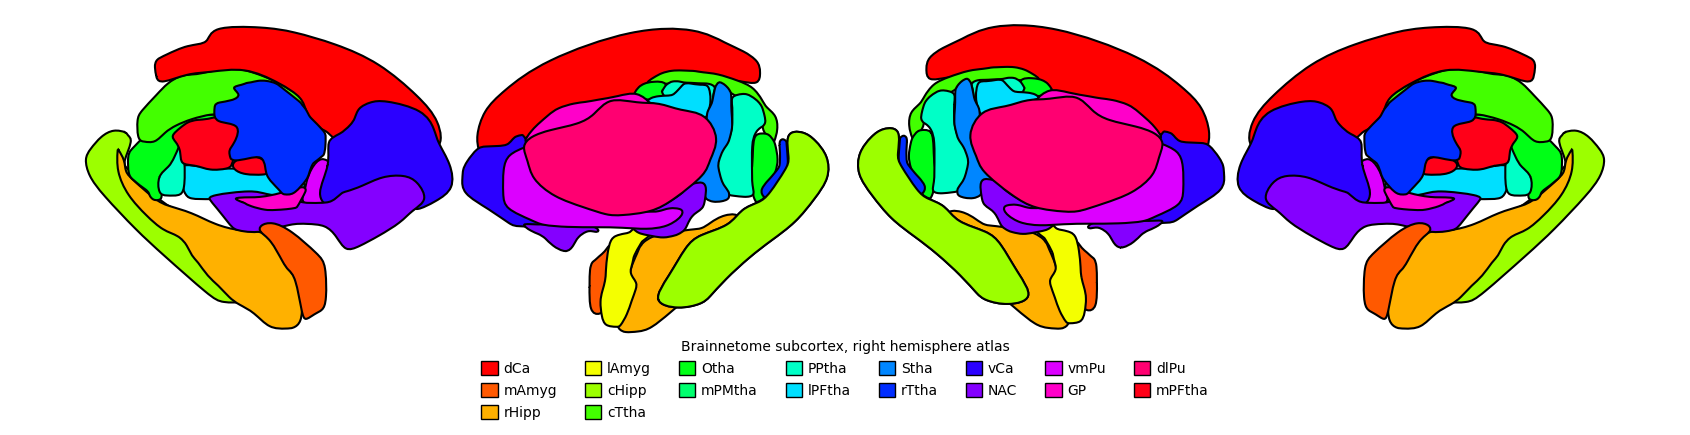

In [9]:
# AICHA
plot_subcortical_data(atlas = 'Brainnetome', hemisphere='both', 
                      fill_title = "Brainnetome subcortex, right hemisphere atlas", cmap='hsv')

## Let's simulate and visualize some continuous data!

Above we just colored each region by index, but now let's simulate some continuous data to demonstrate how you might plot real data (for example, region volume or functional activity) in a given atlas.
We'll work with the `aseg` atlas for simplicity.

In [10]:
np.random.seed(127)

example_continuous_data_L = pd.DataFrame({"region": ["accumbens", "amygdala", "caudate", "hippocampus", "pallidum", "putamen", "thalamus"],
                                          "value": np.random.normal(0, 1, 7)}).assign(Hemisphere = "L")
example_continuous_data_R = pd.DataFrame({"region": ["accumbens", "amygdala", "caudate", "hippocampus", "pallidum", "putamen", "thalamus"],
                                            "value": np.random.normal(0, 1, 7)}).assign(Hemisphere = "R")
example_continuous_data = pd.concat([example_continuous_data_L, example_continuous_data_R], axis=0)

# See what the left hemisphere data, randomly sampled from a normal distribution, looks like
example_continuous_data_L

,region,value,Hemisphere
0,accumbens,-0.571809,L
1,amygdala,0.029624,L
2,caudate,0.562592,L
3,hippocampus,-0.647652,L
4,pallidum,-0.845436,L
5,putamen,0.106565,L
6,thalamus,1.732392,L


Left hemisphere:

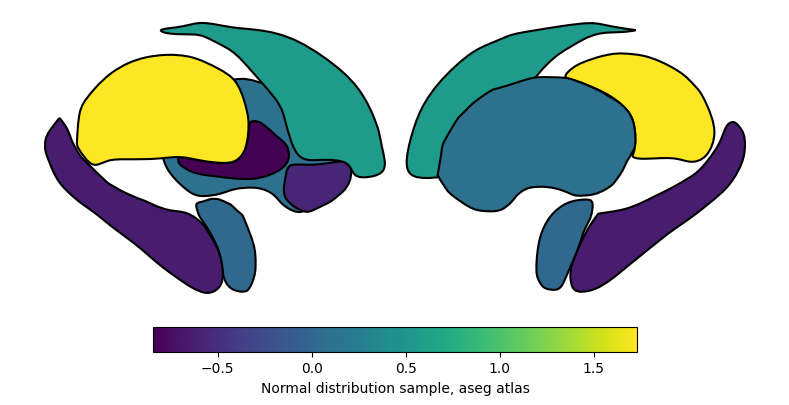

In [11]:
plot_subcortical_data(subcortex_data=example_continuous_data_L, 
                      atlas = 'aseg',
                      hemisphere='L', 
                      fill_title = "Normal distribution sample, aseg atlas", 
                      cmap='viridis')

Right hemisphere:

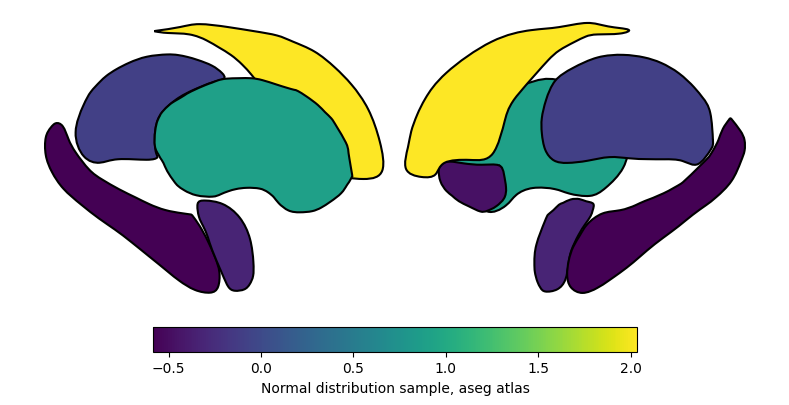

In [12]:
plot_subcortical_data(subcortex_data=example_continuous_data_R, 
                      atlas = 'aseg',
                      hemisphere='R', 
                      fill_title = "Normal distribution sample, aseg atlas", 
                      cmap='viridis')

Both hemispheres together:

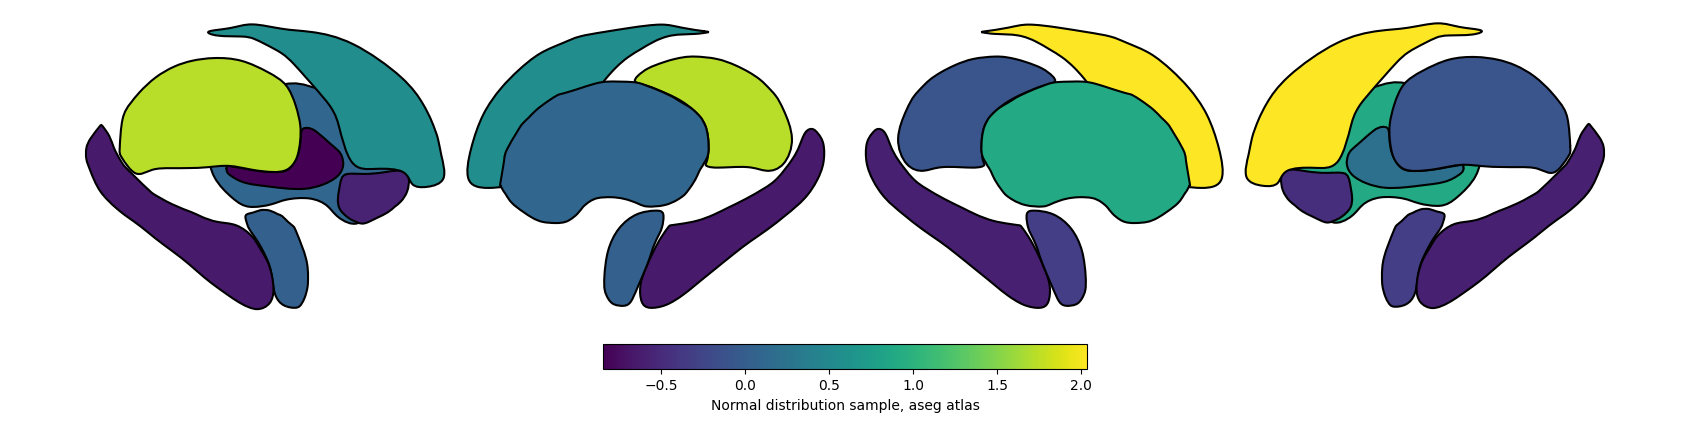

In [13]:
plot_subcortical_data(subcortex_data=example_continuous_data, 
                      atlas = 'aseg', 
                      hemisphere='both', 
                      fill_title = "Normal distribution sample, aseg atlas", 
                      cmap='viridis')

You can pass in a custom colormap too! For example, if you want to fill in with a gradient ranging from white to red:

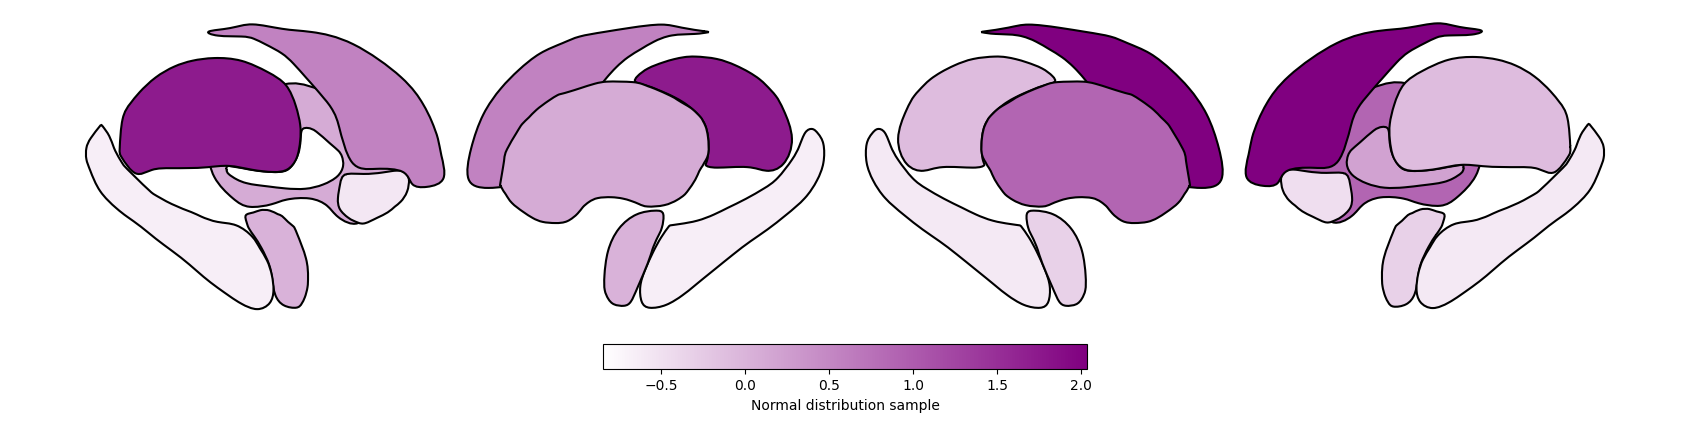

In [14]:
white_to_purple_cmap = mcolors.LinearSegmentedColormap.from_list("white_to_purple", ["white", "purple"])

plot_subcortical_data(subcortex_data=example_continuous_data, 
                      atlas = 'aseg', 
                      hemisphere='both', 
                      fill_title = "Normal distribution sample", 
                      cmap=white_to_purple_cmap)

Since this data has positive and negative values, we can pass in a color palette from blue (negative) to white (0) to red (positive). 
`plot_subcortical_data` takes an argument `midpoint` that specifies the center point for the color palette.
Setting this to 0 here enforces the center value to be white.
Without setting vmin/vmax explicitly, the color range will be defined symmetrically around `midpoint` to capture the full range of the data.

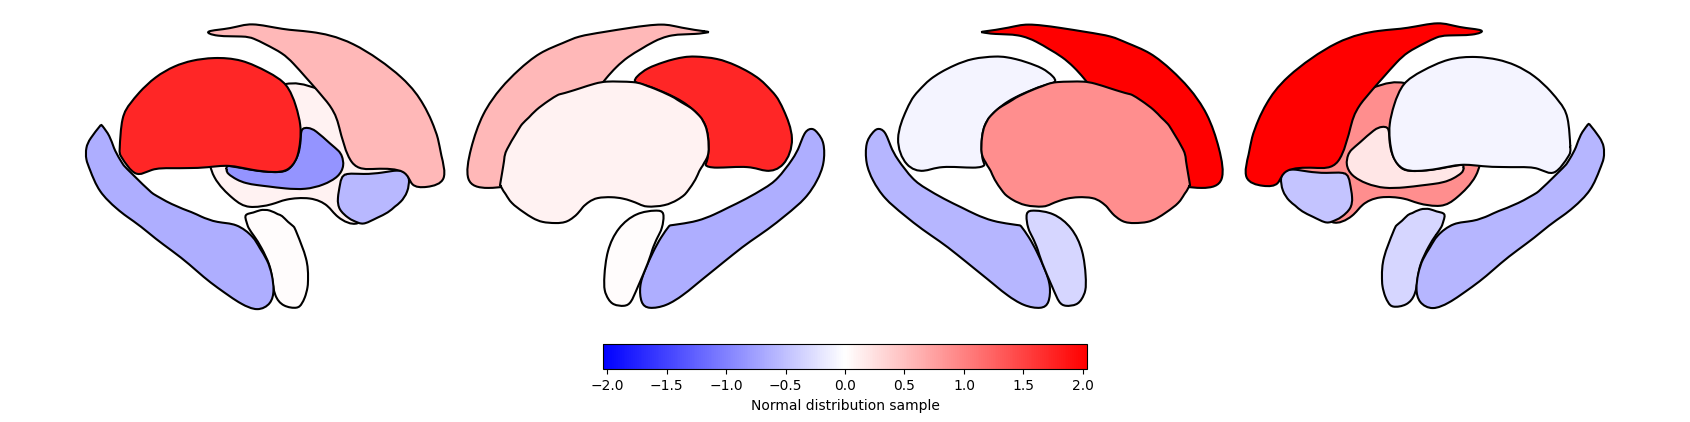

In [15]:
white_blue_red_cmap = mcolors.LinearSegmentedColormap.from_list("BlueWhiteRed", ["blue", "white", "red"])

plot_subcortical_data(subcortex_data=example_continuous_data, 
                      atlas = 'aseg',  
                      hemisphere='both', 
                      fill_title = "Normal distribution sample", 
                      cmap=white_blue_red_cmap, midpoint=0)